In [53]:
# Load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
import plotly.graph_objects as go
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.feature_selection import VarianceThreshold, SequentialFeatureSelector, RFE, SelectFromModel, SelectKBest, chi2, f_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score

In [54]:
data = pd.read_csv(r'src\rawDataset.csv')

In [55]:
data.drop(columns=['RowNumber','Surname','CustomerId'], inplace= True)

In [56]:
numeric_columns = ["CreditScore", "Tenure", "Balance", "EstimatedSalary", "Point Earned"]

In [57]:
bins = [0, 30, 40, 50, 60, 100]  
labels = ['<30', '30-40', '40-50', '50-60', '>60']

data['Age'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)


In [58]:
categorical_columns = ['Age', 'Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Complain', 'Satisfaction Score', 'Card Type']

In [59]:
def winsorize_outliers(data, column, multiplier):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    low_bound = q1 - multiplier * iqr
    high_bound = q3 + multiplier * iqr

    data[column] = np.where(data[column] < low_bound, low_bound, data[column])
    data[column] = np.where(data[column] > high_bound, high_bound, data[column])

In [60]:
winsorize_outliers(data, "CreditScore", 1.5)

In [61]:
data['Tenure'] = data['Tenure'].astype(int)
data['NumOfProducts'] = data['NumOfProducts'].astype(int)
data['HasCrCard'] = data['HasCrCard'].astype(int)
data['IsActiveMember'] = data['IsActiveMember'].astype(int)
data['Exited'] = data['Exited'].astype(int)
data['Complain'] = data['Complain'].astype(int)
data['Satisfaction Score'] = data['Satisfaction Score'].astype(int)

In [62]:
scaler = StandardScaler()
data[numeric_columns]= scaler.fit_transform(data[numeric_columns])

In [63]:
data['Balance_to_Salary'] = data['Balance'] / (data['EstimatedSalary'] + 1)

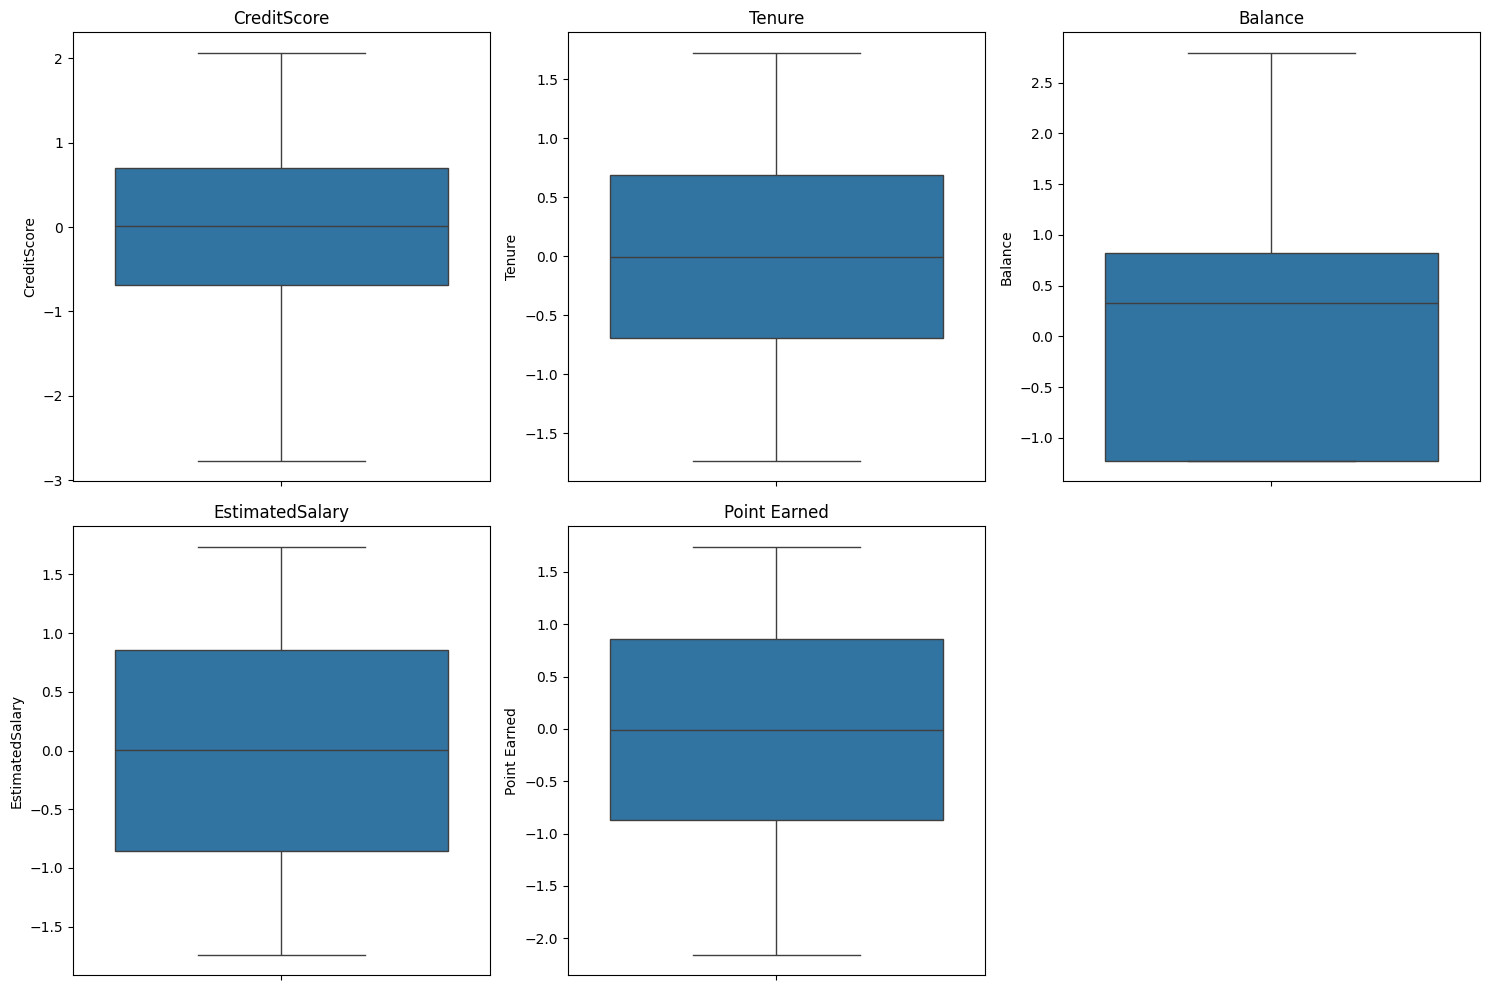

In [64]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=data[column])
    plt.title(column)

plt.tight_layout()
plt.show()

# ahora mi parte

In [65]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.metrics import (adjusted_rand_score, mutual_info_score, homogeneity_score,
                             completeness_score, v_measure_score, silhouette_score,
                             calinski_harabasz_score, davies_bouldin_score)


In [67]:
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Point Earned', 'Balance_to_Salary']
categorical_features = ['Geography', 'Gender', 'Card Type']

In [68]:
print(data[numerical_features].describe())

        CreditScore        Tenure       Balance  NumOfProducts  \
count  1.000000e+04  1.000000e+04  1.000000e+04   10000.000000   
mean   4.121148e-16 -1.078249e-16 -6.252776e-17       1.530200   
std    1.000050e+00  1.000050e+00  1.000050e+00       0.581654   
min   -2.771109e+00 -1.733315e+00 -1.225848e+00       1.000000   
25%   -6.893695e-01 -6.959818e-01 -1.225848e+00       1.000000   
50%    1.490049e-02 -4.425957e-03  3.319639e-01       1.000000   
75%    6.984567e-01  6.871299e-01  8.199205e-01       2.000000   
max    2.065569e+00  1.724464e+00  2.795323e+00       4.000000   

       EstimatedSalary  Point Earned  Balance_to_Salary  
count     1.000000e+04  1.000000e+04       10000.000000  
mean     -2.877698e-17  1.696421e-16          -5.866980  
std       1.000050e+00  1.000050e+00         373.829180  
min      -1.740268e+00 -2.157972e+00      -27423.703728  
25%      -8.535935e-01 -8.698686e-01          -0.876574  
50%       1.802807e-03 -6.706548e-03           0.182933  

In [69]:
data2 = data.drop(columns=["Exited"])

In [70]:
data_C = data2[numeric_columns + ['Balance_to_Salary']]


In [71]:
y = data["Exited"]

In [72]:
inertia = []
for k in range(1, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_C)
    inertia.append(kmeans.inertia_)

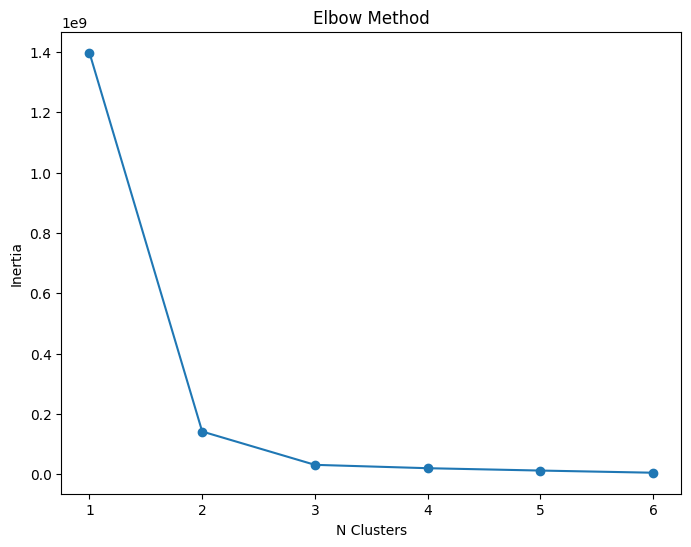

In [73]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 7), inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("N Clusters")
plt.ylabel("Inertia")
plt.show()

In [74]:
cluster_num = 2

In [75]:
res = {}

In [76]:
def evaluate_clustering(true_labels, pred_labels, algorithm_name, data):
    res[algorithm_name] = {
      'Silhouette Score': silhouette_score(data, pred_labels),
        'Calinski-Harabasz Index': calinski_harabasz_score(data, pred_labels),
        'Davies-Bouldin Index': davies_bouldin_score(data, pred_labels),
    }

partitioning

In [101]:
kmeans = KMeans(n_clusters=cluster_num)
kmeans_labels = kmeans.fit_predict(data_C)

In [102]:
evaluate_clustering(y, kmeans_labels, 'KMeans', data_C)

In [79]:
print('KMeans results:')
for metric, score in res['KMeans'].items():
    print(f"{metric}: {score}")

KMeans results:
Silhouette Score: 0.9994655127208152
Calinski-Harabasz Index: 88649.83922775765
Davies-Bouldin Index: 0.09455652015515076


hierarchical (does not compute cluster centers)

In [80]:
agglo = AgglomerativeClustering(n_clusters=cluster_num)
data['Cluster'] = agglo.fit_predict(data_C)

BIRCH

In [81]:
birch = Birch(n_clusters=cluster_num)
birch_labels = birch.fit_predict(data_C)

In [82]:
evaluate_clustering(y, birch_labels, 'BIRCH', data_C)

In [83]:
print('BIRCH results:')
for metric, score in res['BIRCH'].items():
    print(f"{metric}: {score}")

BIRCH results:
Silhouette Score: 0.9994655127208152
Calinski-Harabasz Index: 88649.83922775765
Davies-Bouldin Index: 0.09455652015515076


density based

In [84]:
from sklearn.cluster import OPTICS
optics = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.05)  # Adjust parameters as needed
optc_labels = optics.fit_predict(data_C)

In [85]:
evaluate_clustering(y, optc_labels, 'OPTICS', data_C)

In [ ]:
print('OPTICS results:')
for metric, score in res['OPTICS'].items():
    print(f"{metric}: {score}")

OPTICS results:
Silhouette Score: 0.9749755896583406
Calinski-Harabasz Index: 258.22490307271136
Davies-Bouldin Index: 2.0530469788934074


In [87]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=cluster_num)
dbscan_labels = dbscan.fit_predict(data_C)

In [88]:
evaluate_clustering(y, dbscan_labels, 'DBSCAN', data_C)

In [89]:
print('DBSCAN results:')
for metric, score in res['DBSCAN'].items():
    print(f"{metric}: {score}")

DBSCAN results:
Silhouette Score: -0.496748220448593
Calinski-Harabasz Index: 0.0075988743092962555
Davies-Bouldin Index: 2.4799002663124794


gaussian

In [90]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=cluster_num)
gmm_labels = gmm.fit_predict(data_C)

In [91]:
evaluate_clustering(y, gmm_labels, 'GaussianMixture', data_C)

In [92]:
print('GaussianMixture results:')
for metric, score in res['GaussianMixture'].items():
    print(f"{metric}: {score}")

GaussianMixture results:
Silhouette Score: 0.9994655127208152
Calinski-Harabasz Index: 88649.83922775765
Davies-Bouldin Index: 0.09455652015515076


Conclussions

# Silhouette
- KMeans/BIRCH: 0.999 (excellent clustering). Indicates very well-separated clusters.
- OPTICS: 0.975 (very good). Slightly lower than KMeans/- BIRCH but still highly effective.
- DBSCAN: -0.497 (poor clustering). Negative values suggest overlapping clusters or outliers.
# Calinski
- KMeans/BIRCH: 88,649.84 (exceptionally good). Suggests that the clusters are compact and distinct.
- OPTICS: 258.22 (poor). Clusters are less compact or overlapping.
- DBSCAN: 0.0076 (very poor). Indicates extreme overlap or a lack of clustering structure.
# Davies-Bouldin
- KMeans/BIRCH: 0.0945 (excellent). Very distinct and compact clusters.
- OPTICS: 2.05 (poor). Clusters are less distinct and more overlapping.
- DBSCAN: 2.48 (very poor). Significant overlap or poor separation.

Conclussions
- Kmeans and BIRCH offer the best results

Cluster Visualization
minimo kmeans y birch

BIRCH Visualization

C:\Users\josiw\AppData\Local\Temp\ipykernel_18700\4223044704.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_C['Cluster'] = birch_labels


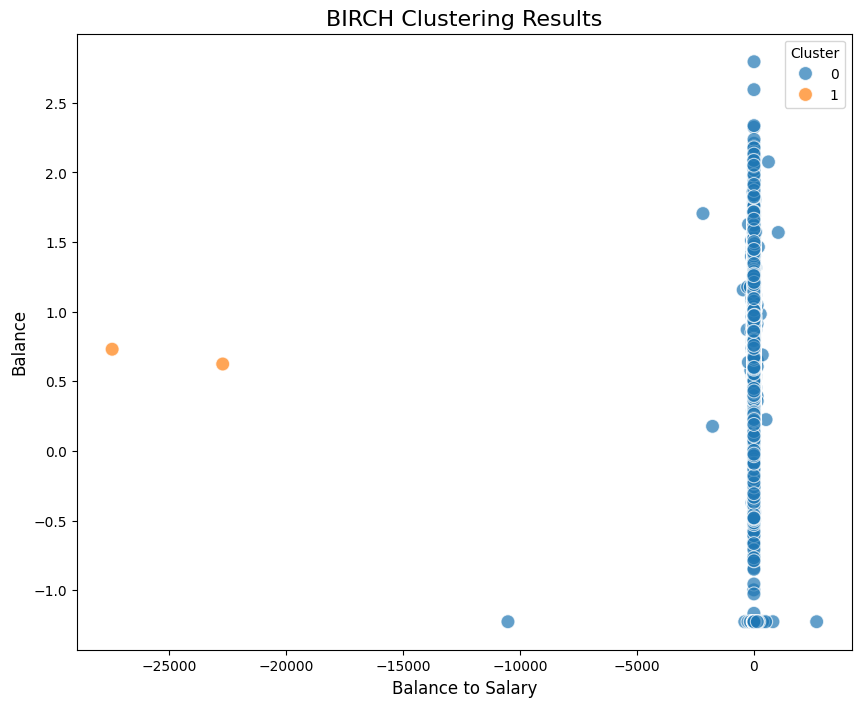

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assign the cluster labels to your data
data_C['Cluster'] = birch_labels

# Create a scatter plot to visualize the clustering
plt.figure(figsize=(10, 8))
sns.scatterplot(data=data_C, x='Balance_to_Salary', y='Balance', hue='Cluster', palette='tab10', s=100, alpha=0.7)
plt.title('BIRCH Clustering Results', fontsize=16)
plt.xlabel('Balance to Salary', fontsize=12)
plt.ylabel('Balance', fontsize=12)
plt.legend(title='Cluster')
plt.show()


This scatter plot uses Balance_to_Salary and Balance as the x and y axes, but you can change the axes to any other numerical features you are interested in. The clusters will be distinguished by different colors.

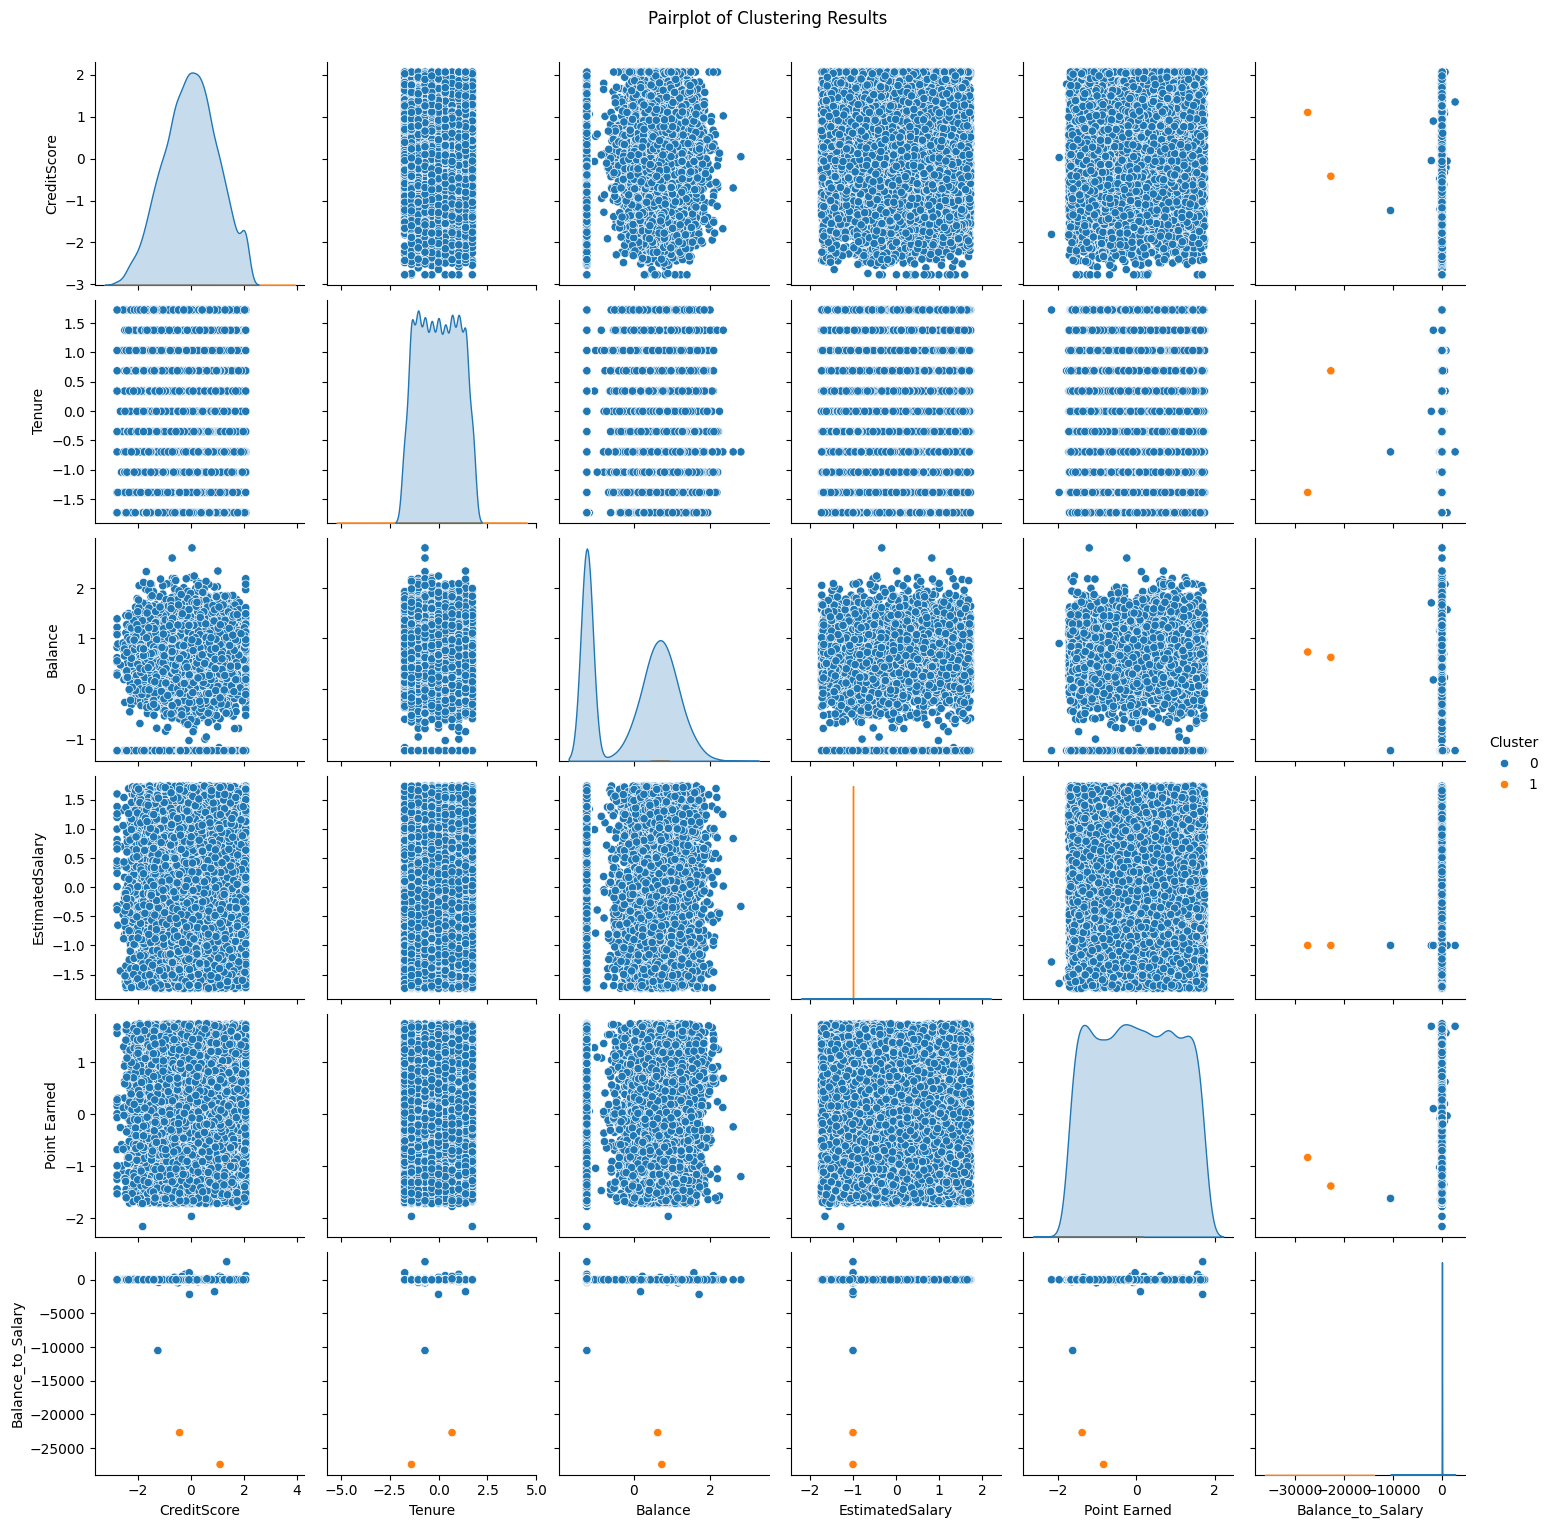

In [111]:
sns.pairplot(data_C, hue="Cluster", palette="tab10", markers="o")
plt.suptitle("Pairplot of Clustering Results", y=1.02)
plt.show()


lots of different plots
- habra k ver en cual se ve mejor pero es mas o menos todo lo mismo

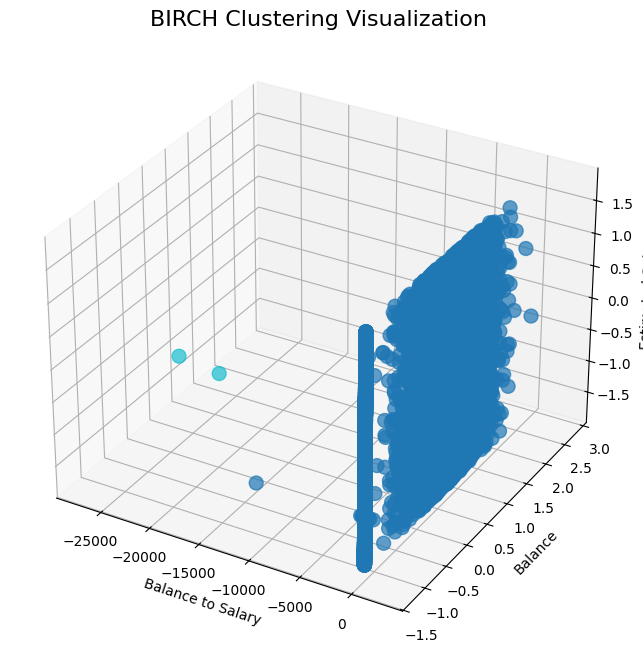

In [129]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Choose three features for the 3D plot
x = data_C['Balance_to_Salary']
y = data_C['Balance']
z = data_C['EstimatedSalary']

# Scatter plot
ax.scatter(x, y, z, c=birch_labels, cmap='tab10', s=100, alpha=0.7)

ax.set_xlabel('Balance to Salary')
ax.set_ylabel('Balance')
ax.set_zlabel('Estimated Salary')
plt.title('BIRCH Clustering Visualization', fontsize=16)
plt.show()


OPTICS Visualization

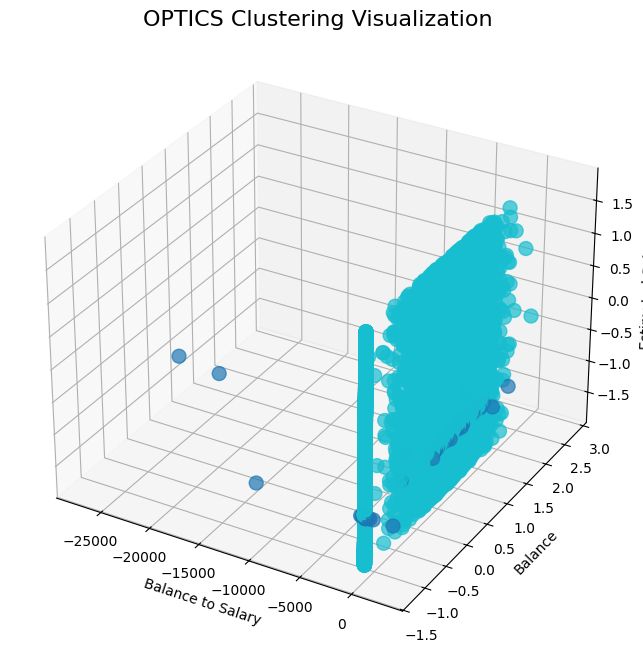

In [128]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Choose three features for the 3D plot
x = data_C['Balance_to_Salary']
y = data_C['Balance']
z = data_C['EstimatedSalary']

# Scatter plot
ax.scatter(x, y, z, c=optc_labels, cmap='tab10', s=100, alpha=0.7)

ax.set_xlabel('Balance to Salary')
ax.set_ylabel('Balance')
ax.set_zlabel('Estimated Salary')
plt.title('OPTICS Clustering Visualization', fontsize=16)
plt.show()

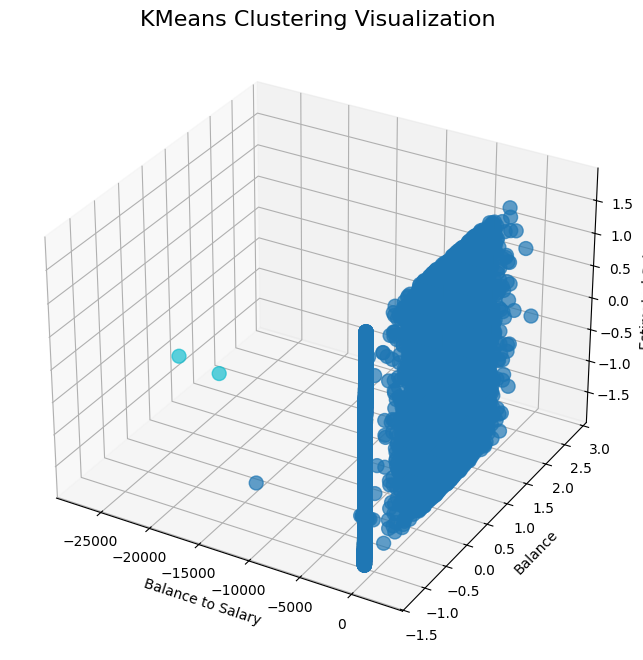

In [127]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Choose three features for the 3D plot
x = data_C['Balance_to_Salary']
y = data_C['Balance']
z = data_C['EstimatedSalary']

# Scatter plot
ax.scatter(x, y, z, c=kmeans_labels, cmap='tab10', s=100, alpha=0.7)

ax.set_xlabel('Balance to Salary')
ax.set_ylabel('Balance')
ax.set_zlabel('Estimated Salary')
plt.title('KMeans Clustering Visualization', fontsize=16)
plt.show()

Tema Centroids